 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% !important;} </style>"))

from bisect import *
import pprint
import os
import pandas as pd
from scipy import constants as const
from sqlalchemy import create_engine
from sqlalchemy.orm import relationship, sessionmaker
from sqlalchemy import inspect, MetaData

import PyMAD.PyMAD_hzb as pm
import TwissTools.ReadTwiss as rt
from LatticePlot import PlottingFunctions as pf

import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib

from collections import OrderedDict
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from scipy import io
from scipy.interpolate import interp1d
init_notebook_mode(connected=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
df = rt.get_twissdata('/home/tmerten/mad/2018-02-14/madin/here.tfs')

In [29]:
br = 4.36148
df['hx'] =  df['BETX'] * df['DPX']**2 + 2. *df['ALFX'] * df['DX'] * df['DPX'] + (1+ df['ALFX']**2)/df['BETX'] * df['DX']**2 

In [31]:
df['hx'].unique()

array([ 0.00041365,  0.00041365,  0.00041365, ...,  0.00041396,
        0.00041396,  0.00041396])

In [47]:
df['I5']= df['hx'] * df['L']/ br**3 / (2*np.pi)

In [45]:
df['I5']= df['hx'] * 2 * np.pi * df['L']/ br**2

In [48]:
df['I5'].sum()

0.003017534886681899

In [38]:
np.sqrt(5.5e-8*0.43)

0.00015378556499229699

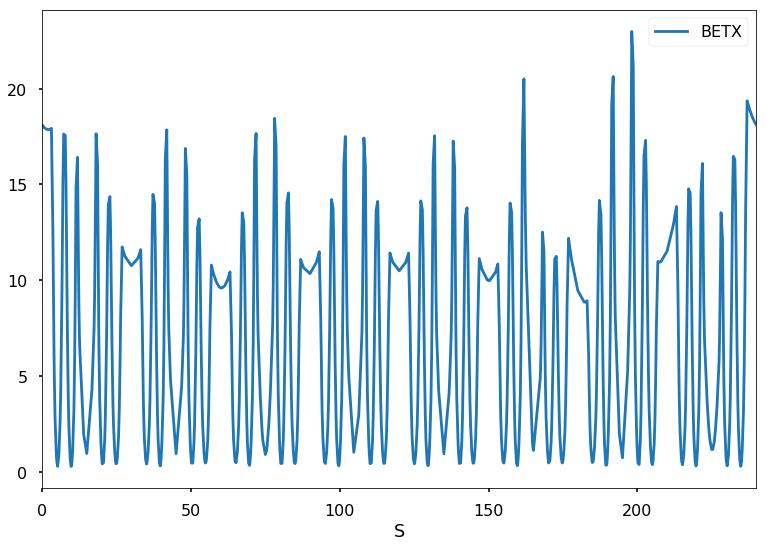

In [19]:
with plt.style.context(['seaborn-poster']):
    df.plot(x='S',y='BETX')
plt.show()